# DSLabs functions

In [133]:
%run "scripts/dslabs_functions.py"


# Data functions

In [134]:
%run "scripts/data_functions.py"


data_functions loaded


# Load

In [135]:
import pandas as pd
import numpy as np


filepath=r'data/df_merch_0_2024_agg_time_scaling_input.csv'

file_tag = "Google Merch Store 2024-2025"


# test_data=True
test_data=False

# already scaled daily data
data=pd.read_csv(filepath, decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)

# aggregate unscaled data to weekly and monthly sums. 
# note: not all variables are suited for sum aggregation. 
# use like this just for illustation on target studies (which will be scaled afterwards)
unscaled_data = pd.read_csv(r'data/df_merch_0_2024_agg_time_mv_input.csv', decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)
unscaled_weekly=unscaled_data.resample('W').sum()
unscaled_monthly=unscaled_data.resample('M').sum()

 
target='Sessions'
series: Series = data[target]


test_split_threshold = 0.7

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 427 entries, 2024-01-04 to 2025-03-05
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sessions                         427 non-null    float64
 1   Seven-day active users           427 non-null    float64
 2   28-day active users              427 non-null    float64
 3   Events per session               427 non-null    float64
 4   Average purchase revenue         427 non-null    float64
 5   Purchase revenue                 427 non-null    float64
 6   Average session duration         427 non-null    float64
 7   ARPU                             427 non-null    float64
 8   ARPPU                            427 non-null    float64
 9   Views per user                   427 non-null    float64
 10  Promotion clicks                 427 non-null    float64
 11  Sessions Mobile                  427 non-null    float64
 12  Sev

# no aggregation

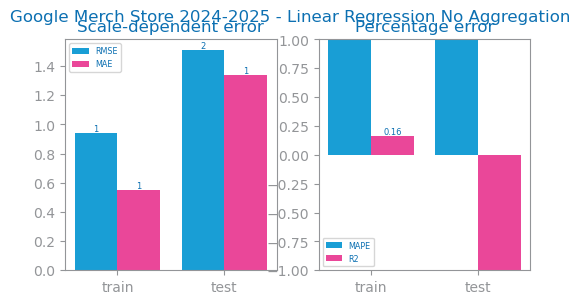

In [136]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression
from numpy import arange


data_0 = data.copy()

# Split the data into train and test sets
train_0, test_0 = series_train_test_split(data_0, trn_pct=test_split_threshold)


# Ensure no data leakage
assert not set(train_0.index).intersection(set(test_0.index)), "Data leakage detected: Train and test sets overlap."



# Prepare the training and testing data using the time index as the feature
trnX_0 = arange(len(train_0)).reshape(-1, 1)
trnY_0 = train_0[target].to_numpy()
tstX_0 = arange(len(train_0), len(data_0)).reshape(-1, 1)
tstY_0 = test_0[target].to_numpy()



# Fit the linear regression model
model_0 = LinearRegression()
model_0.fit(trnX_0, trnY_0)

# Predict the training and testing data
prd_trn_0 = Series(model_0.predict(trnX_0), index=train_0.index)
prd_tst_0 = Series(model_0.predict(tstX_0), index=test_0.index)

# Plot the forecasting evaluation
plot_forecasting_eval(train_0[target], test_0[target], prd_trn_0, prd_tst_0, title=f"{file_tag} - Linear Regression No Aggregation")
savefig(f"images/{file_tag}_linear_regression_eval_no_aggreagation.png")

## no aggregation plot

<Axes: xlabel='Date', ylabel='Sessions'>

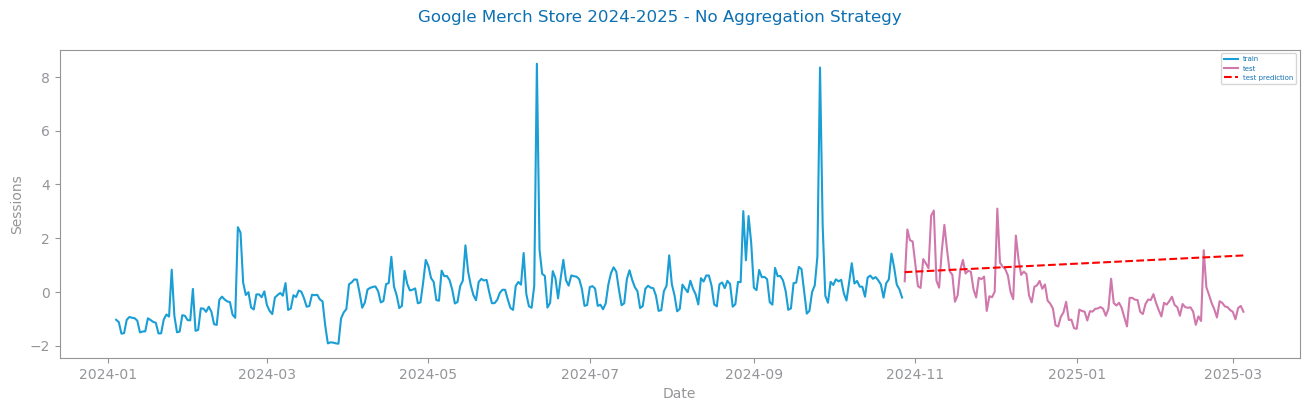

In [137]:
plot_forecasting_series(
    train_0[target],
    test_0[target],
    prd_tst_0,
    title=f"{file_tag} - No Aggregation Strategy",
    xlabel='Date',
    ylabel=target,
)

# Aggregation - Weekly

## Aggregation Weekly strategy Application

In [138]:

from sklearn.preprocessing import StandardScaler


def apply_strategy_1(df):

    
    
    df_copy=unscaled_weekly.copy()
    
    # Apply scaling to the entire DataFrame
    transf = StandardScaler(with_mean=True, with_std=True, copy=True).fit(df_copy)
    df_zscore = DataFrame(transf.transform(df_copy), index=df_copy.index, columns=df_copy.columns)

    
    return df_zscore


data_1=apply_strategy_1(data)

series_1: Series = data_1[target]

data_1



,Sessions,Seven-day active users,28-day active users,Events per session,Average purchase revenue,Purchase revenue,Average session duration,ARPU,ARPPU,Views per user,...,Sessions other,Sessions referral,season,commercial_season,week_of_month,day_of_week_nr,is_weekend,is_holiday,is_major_event_day,is_commercial_event_day
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-07,-2.195602,-2.627224,-2.856392,-0.906075,-2.259524,-1.022907,-1.005480,-0.415396,-2.309055,-0.747539,...,-0.709224,-0.883532,-0.426180,0.116581,-2.277481,-1.160792,0.128037,-0.489898,-0.384900,-0.182574
2024-01-14,-1.563629,-1.774234,-2.558774,1.746039,-0.390620,-0.584432,2.155777,1.282089,-0.526250,1.496438,...,-0.709224,-0.775164,-0.426180,-0.414892,-0.955348,0.147737,0.128037,-0.489898,-0.384900,-0.182574
2024-01-21,-1.741512,-1.791517,-2.285160,1.406094,-1.648509,-1.080409,1.126200,-0.592683,-1.783214,1.002289,...,-0.709224,-0.834983,-0.426180,-0.414892,-0.029855,0.147737,0.128037,2.041241,-0.384900,-0.182574
2024-01-28,-1.130555,-1.434920,-1.924181,1.362059,-1.343584,-0.745245,1.704768,-0.241640,-1.409660,1.016757,...,-0.709224,-0.820245,-0.426180,-0.414892,0.895638,0.147737,0.128037,-0.489898,-0.384900,-0.182574
2024-02-04,-1.291550,-1.322248,-1.611189,1.204373,-0.552568,-0.428671,2.256835,1.062863,-0.375890,1.387045,...,-0.709224,-0.828047,-0.426180,-0.840071,-0.294281,0.147737,0.128037,-0.489898,-0.384900,-0.182574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-09,-0.629180,-0.613857,-0.578217,0.351022,1.152049,-0.433522,0.323313,0.010892,0.985567,0.251274,...,-0.709224,-0.355561,-0.426180,-1.158956,-0.955348,0.147737,0.128037,-0.489898,2.598076,-0.182574
2025-02-16,-0.974626,-0.792825,-0.641235,0.543603,0.532115,-0.614127,0.800833,-0.062756,0.376053,0.505950,...,-0.709224,-0.620847,-0.426180,-1.158956,-0.029855,0.147737,0.128037,-0.489898,-0.384900,-0.182574
2025-02-23,-0.253523,-0.495201,-0.599724,0.708373,0.649918,-0.414728,0.918527,-0.536262,0.388252,0.492912,...,-0.709224,0.632760,-0.426180,-1.158956,0.895638,0.147737,0.128037,2.041241,-0.384900,-0.182574


## Aggregation Weekly 1 evaluate

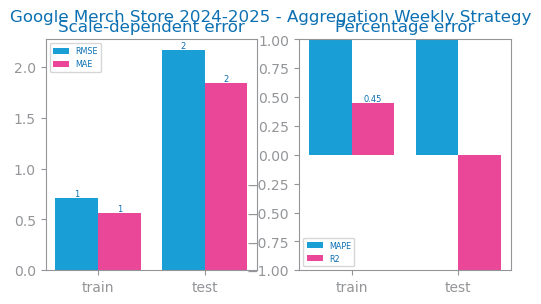

In [139]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression
from numpy import arange


# Split the data into train and test sets
train_1, test_1 = series_train_test_split(data_1, trn_pct=test_split_threshold)

# Ensure no data leakage
assert not set(train_1.index).intersection(set(test_1.index)), "Data leakage detected: Train and test sets overlap."

# Prepare the training and testing data using the time index as the feature
trnX_1 = arange(len(train_1)).reshape(-1, 1)
trnY_1 = train_1[target].to_numpy()
tstX_1 = arange(len(train_1), len(data_1)).reshape(-1, 1)
tstY_1 = test_1[target].to_numpy()


# Fit the linear regression model
model_1 = LinearRegression()
model_1.fit(trnX_1, trnY_1)

# Predict the training and testing data
prd_trn_1 = Series(model_1.predict(trnX_1), index=train_1.index)
prd_tst_1 = Series(model_1.predict(tstX_1), index=test_1.index)

# Plot the forecasting evaluation
plot_forecasting_eval(train_1[target], test_1[target], prd_trn_1, prd_tst_1, title=f"{file_tag} - Aggregation Weekly Strategy")
savefig(f"images/{file_tag}_linear_regression_agg_weekly.png")

## Aggreagation Weekly Plot

<Axes: xlabel='Date', ylabel='Sessions'>

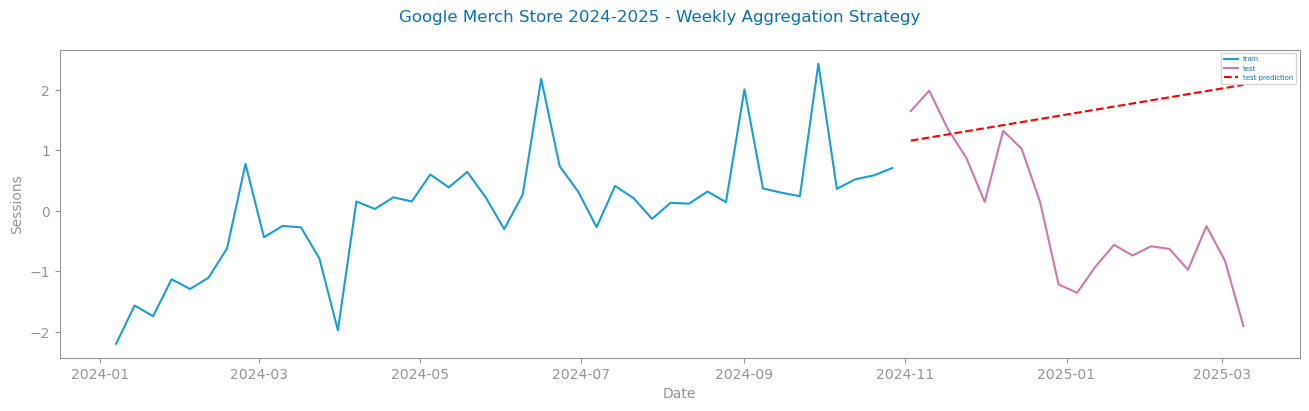

In [140]:
plot_forecasting_series(
    train_1[target],
    test_1[target],
    prd_tst_1,
    title=f"{file_tag} - Weekly Aggregation Strategy",
    xlabel='Date',
    ylabel=target,
)

# Aggregation - Monthly

## Aggregation Monthly Strategy Application

In [141]:
from pandas import DataFrame, Series
from sklearn.preprocessing import MinMaxScaler



def apply_strategy_2(df):

    
    df_copy=unscaled_monthly.copy()
    
    # Apply scaling to the entire DataFrame
    transf = StandardScaler(with_mean=True, with_std=True, copy=True).fit(df_copy)
    df_zscore = DataFrame(transf.transform(df_copy), index=df_copy.index, columns=df_copy.columns)

    
    
    return df_zscore

data_2=apply_strategy_2(data)

series_2: Series = data_2[target]

## Aggregation Monthly evaluate

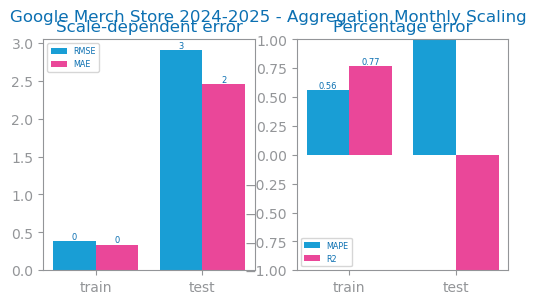

In [142]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression


# Split the data into train and test sets
train_2, test_2 = series_train_test_split(data_2, trn_pct=test_split_threshold)

# Ensure no data leakage
assert not set(train_2.index).intersection(set(test_2.index)), "Data leakage detected: Train and test sets overlap."

# Prepare the training and testing data using the time index as the feature
trnX_2 = arange(len(train_2)).reshape(-1, 1)
trnY_2 = train_2[target].to_numpy()
tstX_2 = arange(len(train_2), len(data_2)).reshape(-1, 1)
tstY_2 = test_2[target].to_numpy()

# Fit the linear regression model
model_2 = LinearRegression()
model_2.fit(trnX_2, trnY_2)

# Predict the training and testing data
prd_trn_2 = Series(model_2.predict(trnX_2), index=train_2.index)
prd_tst_2 = Series(model_2.predict(tstX_2), index=test_2.index)

# Plot the forecasting evaluation
plot_forecasting_eval(train_2[target], test_2[target], prd_trn_2, prd_tst_2, title=f"{file_tag} - Aggregation Monthly Scaling")
savefig(f"images/{file_tag}_linear_regression_eval_agg_monthly.png")

## Aggregation Monthly Plot

<Axes: xlabel='Date', ylabel='Sessions'>

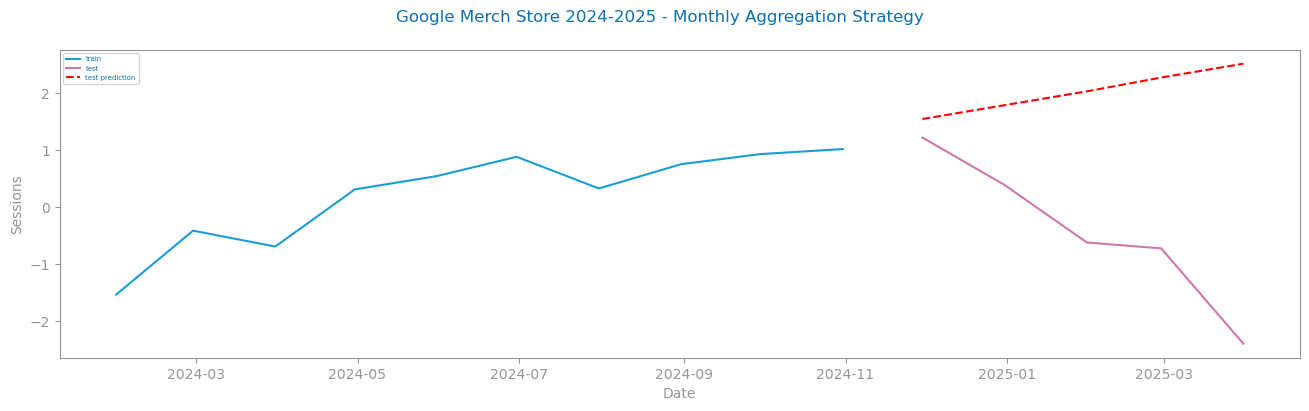

In [143]:
plot_forecasting_series(
    train_2[target],
    test_2[target],
    prd_tst_2,
    title=f"{file_tag} - Monthly Aggregation Strategy",
    xlabel='Date',
    ylabel=target,
)

# Approach uplift comparison

In [144]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10  # Small constant to avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Calculate performance metrics for each model
metrics = {
    "Model": ["No Aggregation", "Weekly Aggregation", "Monthly Aggregation"],
    "MAE": [
        mean_absolute_error(test_0[target], prd_tst_0),
        mean_absolute_error(test_1[target], prd_tst_1),
        mean_absolute_error(test_2[target], prd_tst_2)
    ],
    "MSE": [
        mean_squared_error(test_0[target], prd_tst_0),
        mean_squared_error(test_1[target], prd_tst_1),
        mean_squared_error(test_2[target], prd_tst_2)
    ],
    "RMSE": [
        mean_squared_error(test_0[target], prd_tst_0, squared=False),
        mean_squared_error(test_1[target], prd_tst_1, squared=False),
        mean_squared_error(test_2[target], prd_tst_2, squared=False)
    ],
    "R²": [
        r2_score(test_0[target], prd_tst_0),
        r2_score(test_1[target], prd_tst_1),
        r2_score(test_2[target], prd_tst_2)
    ],
    "MAPE": [
        mean_absolute_percentage_error(test_0[target], prd_tst_0),
        mean_absolute_percentage_error(test_1[target], prd_tst_1),
        mean_absolute_percentage_error(test_2[target], prd_tst_2)
    ]
}

# Create a DataFrame to display the metrics
performance_df = pd.DataFrame(metrics)
print(performance_df)

                 Model       MAE       MSE      RMSE        R²         MAPE
0       No Aggregation  1.335990  2.272309  1.507418 -1.608578  1161.996648
1   Weekly Aggregation  1.839095  4.680060  2.163345 -2.856497   315.294062
2  Monthly Aggregation  2.454178  8.417969  2.901374 -4.721281   287.058307


# save to csv

In [145]:
if test_data==False:
    

    data_save=data.copy()

    # apply winning strategy
    # data_save=apply_strategy_1(data_save)

    data_save.reset_index(inplace=True)

        
    data_save.to_csv(f"data/df_merch_0_2024_agg_time_agg_input.csv", index=False)
    

    print(data_save.columns)

Index(['Date', 'Sessions', 'Seven-day active users', '28-day active users',
       'Events per session', 'Average purchase revenue', 'Purchase revenue',
       'Average session duration', 'ARPU', 'ARPPU', 'Views per user',
       'Promotion clicks', 'Sessions Mobile', 'Seven-day active users Mobile',
       '28-day active users Mobile', 'New users Mobile',
       'Scrolled users Mobile', 'Engaged sessions Mobile', 'Views Mobile',
       'Event count Mobile', 'Events per session Mobile',
       'Item-list view events Mobile', 'Item view events Mobile',
       'Add to baskets Mobile', 'Checkouts Mobile',
       'E-commerce purchases Mobile', 'Average purchase revenue Mobile',
       'Purchase revenue Mobile', 'First time purchasers Mobile',
       'Average session duration Mobile', 'Sessions (not set)',
       'Sessions affiliate', 'Sessions cpc', 'Sessions cpm', 'Sessions email',
       'Sessions other', 'Sessions referral', 'season', 'commercial_season',
       'week_of_month', 'day_of